In [1]:
# Library Imports
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sn
from wordcloud import WordCloud
import pprint
import nltk
import warnings
from scipy import interp
import scipy.stats as stats
from collections import Counter

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, plot_roc_curve, roc_curve, auc, f1_score, precision_score, recall_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer, SnowballStemmer
from nltk import ngrams

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
warnings.filterwarnings('ignore')
%autosave 60
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Autosaving every 60 seconds


In [2]:
# Importing the Data on Google Colab
from google.colab import files

uploaded = files.upload()

Saving ted_main.csv to ted_main.csv
Saving transcripts.csv to transcripts.csv


In [3]:
# Data Visibility
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Import data
df1 = pd.read_csv('ted_main.csv')
df2 = pd.read_csv('transcripts.csv')

## Exploring Data/ EDA/ Data Analysis

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

In [5]:
df1.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [6]:
df1.description[0]

'Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education system that nurtures (rather than undermines) creativity.'

In [7]:
df1.ratings[0]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [8]:
df1.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   transcript  2467 non-null   object
 1   url         2467 non-null   object
dtypes: object(2)
memory usage: 38.7+ KB


In [10]:
(df1.event.value_counts() > 1).value_counts()

True     192
False    163
Name: event, dtype: int64

In [11]:
# # Most Freq Events
# events = df1.event.value_counts()
# events = events[:10]

# fig, ax = plt.subplots(figsize=(10, 6))
# sn.barplot(events.index, events.values)
# plt.xticks(rotation=45)
# plt.show()

Text(0.5, 1.0, 'Language Count Histogram')

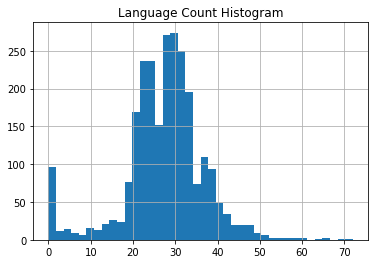

In [12]:
# Language Count Hist
df1.languages.hist(bins=40)
plt.title("Language Count Histogram")

Text(0.5, 1.0, 'Duration Count Histogram')

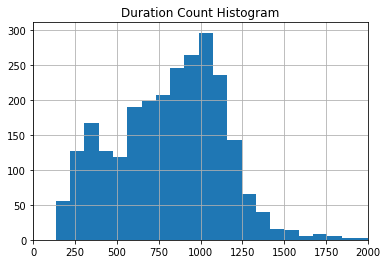

In [13]:
# Duration Count Hist
df1.duration.hist(bins=60)
plt.xlim([0, 2000])
plt.title("Duration Count Histogram")

Text(0.5, 1.0, 'Comment Count Histogram')

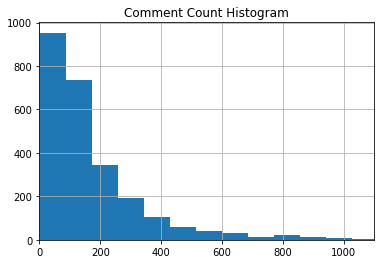

In [14]:
# Comment Count Hist
df1.comments.hist(bins=75)
plt.xlim([0, 1100]) # no comments out of x axis limit
plt.title("Comment Count Histogram")

Text(0.5, 1.0, 'Views Count Distribution Histogram')

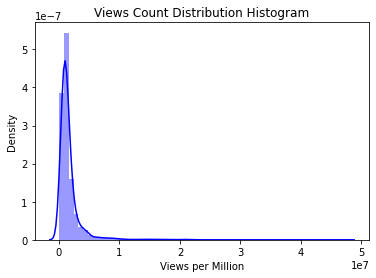

In [15]:
# Views Count Hist - adjusted
# df1.views.hist(bins=500)
sn.distplot(df1.views, color='b', bins=60)

# only one line may be specified; full height 
# plt.axvline(x = df1.views.mean(), color = 'b', label = 'axvline - full height')
# plt.axvline(x = df1.views.std()/2, color = 'g', label = 'axvline - full height')
# plt.axvline(x = 1000000, color = 'r', label = 'axvline - full height')
# plt.xlim([-5000, 20000000])
plt.xlabel('Views per Million')
plt.title("Views Count Distribution Histogram")


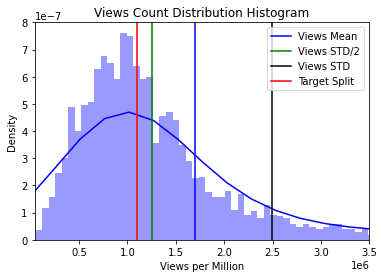

In [152]:
# Views Count Hist - adjusted
# df1.views.hist(bins=1000)
sn.distplot(df1.views, color='b', bins=700)

# only one line may be specified; full height 
plt.axvline(x = df1.views.mean(), color = 'b', label = 'Views Mean')
plt.axvline(x = df1.views.std()/2, color = 'g', label = 'Views STD/2')
plt.axvline(x = df1.views.std(), color = 'k', label = 'Views STD')
plt.axvline(x = 1100000, color = 'r', label = 'Target Split')

plt.xlim([40000, 3500000])
plt.xlabel('Views per Million')
plt.title("Views Count Distribution Histogram")
plt.legend()

In [17]:
# # Views Count Hist - all
# df1.views.hist(bins=500)
# # only one line may be specified; full height 
# plt.axvline(x = df1.views.mean(), color = 'b', label = 'axvline - full height')
# plt.axvline(x = df1.views.std()/2, color = 'g', label = 'axvline - full height')
# plt.axvline(x = df1.views.std(), color = 'g', label = 'axvline - full height')
# plt.axvline(x = 1000000, color = 'r', label = 'axvline - full height')
# plt.xlim([40000, 7500000])
 


No handles with labels found to put in legend.


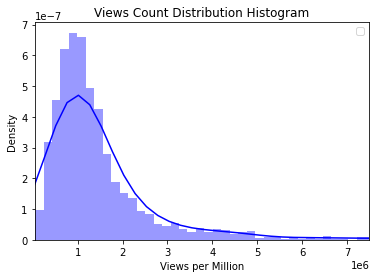

In [18]:
# Views Count Hist - all
# df1.views.hist(bins=500)
sn.distplot(df1.views, color='b', bins=250)

# only one line may be specified; full height 
# plt.axvline(x = df1.views.mean(), color = 'b', label = 'Views Mean')
# plt.axvline(x = df1.views.std()/2, color = 'g', label = 'Views STD/2')
# plt.axvline(x = df1.views.std(), color = 'k', label = 'Views STD')
# plt.axvline(x = 1000000, color = 'r', label = 'Arbitrary Number')
plt.xlim([40000, 7500000])
plt.xlabel('Views per Million')
plt.title("Views Count Distribution Histogram")
plt.legend()

In [23]:
# True Values - Arbitrary Value @1000000
print('True Values with Value Split: {}'.format((df1.views < 1000000).sum()))
# False Values - Arbitrary Value @1000000
print('False Values with Value Split: {}'.format(len(df1.views) - (df1.views < 1000000).sum()))

True Values with Value Split: 1047
False Values with Value Split: 1503


In [24]:
# True Values - Arbitrary Value @1100000
print('True Values with Value Split: {}'.format((df1.views < 1100000).sum()))
# False Values - Arbitrary Value @1100000
print('False Values with Value Split: {}'.format(len(df1.views) - (df1.views < 1100000).sum()))

True Values with Value Split: 1232
False Values with Value Split: 1318


In [25]:
# True Values - Half a STD Value
print('True Values with Value Split: {}'.format((df1.views < df1.views.std()/2).sum()))
# False Values - Half a STD Value
print('False Values with Value Split: {}'.format(len(df1.views) - (df1.views < df1.views.std()/2).sum()))

True Values with Value Split: 1469
False Values with Value Split: 1081


In [26]:
# True Values - Mean Value
print('True Values with Value Split: {}'.format((df1.views < df1.views.mean()).sum()))
# False Values - Mean Value
print('False Values with Value Split: {}'.format(len(df1.views) - (df1.views < df1.views.mean()).sum()))

True Values with Value Split: 1912
False Values with Value Split: 638


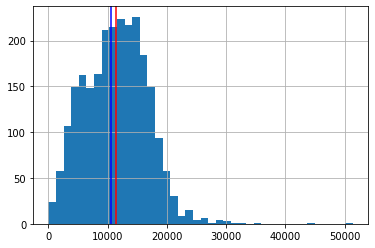

In [27]:
# Transcript Words Count Hist
df2.transcript.str.len().hist(bins=40)
plt.axvline(x = df2.transcript.str.len().std()*2, color = 'b', label = 'axvline - full height')
plt.axvline(x = df2.transcript.str.len().mean(), color = 'r', label = 'axvline - full height')


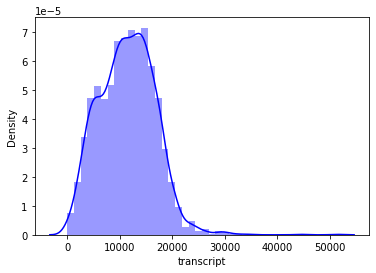

In [28]:
# Transcript Words Count Hist
sn.distplot(df2.transcript.str.len(), color='b', bins=40)

In [29]:
# Views to Comment Ratio
df1.vtoc = df1.views/df1.comments

In [30]:
df1.vtoc.describe()

count      2550.000000
mean      15009.452087
std       17770.824133
min         450.531587
25%        5636.638261
50%        9689.936388
75%       18276.067552
max      323087.000000
dtype: float64

(0.0, 50000.0)

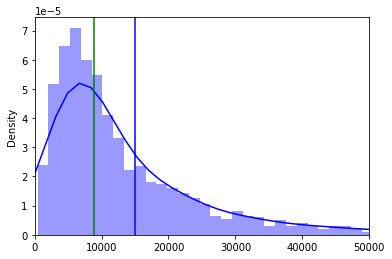

In [31]:
# Views to Comment Ratio Hist - all
# df1.vtoc.hist(bins=500)
sn.distplot(df1.vtoc, color='b', bins=200)
# only one line may be specified; full height 
plt.axvline(x = df1.vtoc.mean(), color = 'b', label = 'axvline - full height')
plt.axvline(x = df1.vtoc.std()/2, color = 'g', label = 'axvline - full height')
# plt.axvline(x = 1000000, color = 'r', label = 'axvline - full height')
plt.xlim([0, 50000])

In [32]:
# top n rows ordered by multiple columns
# df.nlargest(3,['views'])

## Merging Data

In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   transcript  2467 non-null   object
 1   url         2467 non-null   object
dtypes: object(2)
memory usage: 38.7+ KB


In [155]:
# print(df1.url[0])
# print(df2.url[0])

In [35]:
df = df1.merge(df2)

In [36]:
def reset_df(text):
  df = df1.merge(df2)
  return df

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2467 entries, 0 to 2466
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2467 non-null   int64 
 1   description         2467 non-null   object
 2   duration            2467 non-null   int64 
 3   event               2467 non-null   object
 4   film_date           2467 non-null   int64 
 5   languages           2467 non-null   int64 
 6   main_speaker        2467 non-null   object
 7   name                2467 non-null   object
 8   num_speaker         2467 non-null   int64 
 9   published_date      2467 non-null   int64 
 10  ratings             2467 non-null   object
 11  related_talks       2467 non-null   object
 12  speaker_occupation  2461 non-null   object
 13  tags                2467 non-null   object
 14  title               2467 non-null   object
 15  url                 2467 non-null   object
 16  views               2467

In [38]:
# df.views.describe()

In [39]:
# Two Areas worth exploring
df.trans_len = df.transcript.str.len()
df.vtoc = df.views/df.comments

In [40]:
df.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views', 'transcript'],
      dtype='object')

## Adjusting Targets

In [41]:
# Target Median
target_thresh1 = df1.views.std()/2
target_thresh2 = 1100000
# print(target_thresh1, ' ', target_thresh2)

1249239.6860926037   1100000


In [42]:
# Target for Non-favorable V. Favorable at threshold cut off. 0=not-fav, 1=fav
df['target'] = np.where(df.views < target_thresh2, 0, 1)

In [43]:
# for i in range(20):
#   print(df.views[i])
#   print(df.target[i])

In [44]:
df.target.value_counts()

1    1315
0    1152
Name: target, dtype: int64

In [45]:
tar = np.where(df.views < 1100000, 0, 1)
np.bincount(tar)

array([1152, 1315])

Text(0, 0.5, 'Target Count')

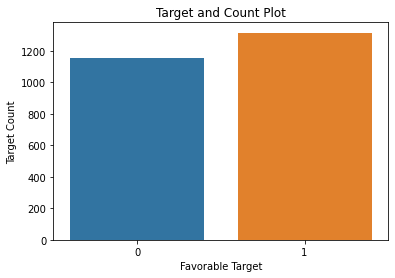

In [46]:
fig, ax = plt.subplots()

sn.countplot(x=df.target) # 0=not-fav, 1=fav
# sn.set_theme(style='darkgrid')
ax.set_title("Target and Count Plot")
ax.set_xlabel("Favorable Target")
ax.set_ylabel("Target Count")

## Text Preprocessing 
* Cleaning Text**

In [47]:
### Text Pre-processing ###


# Cleaning Text
def clean_text(text):
    # Removing Unnecessary Text
    text = str(text)
    text = re.sub(r'\([^)]*\)', ' ', text) # removing audience actions**
    text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', ' ', text) # url-less links
    text = re.sub(r'^https?:\/\/.*[\r\n]*', ' ', text, flags=re.MULTILINE) # links/urls 
    text = re.sub(r'#\S+', '', text)    # hastags  
    text = re.sub(r'[^\w\s]','', text)  # punctuation
    text = re.sub('[0-9]+', '', text)  # times
    text = re.sub('\s{2,}', ' ', text)  # over use of spaces
    text = text.lower()

    return text

# # Removing Stop Words
# extras = [] 
# # stop = text.ENGLISH_STOP_WORDS.union(extras)
# stop_words = set(stopwords.words('english'))
# def remove_sw(text):
#   tokens = word_tokenize(text)
#   # text = [i for i in tokens if i not in stop]
#   # text = (lambda x: ' '.join([item for item in x.split() if item not in stop]))
#   text = text.apply(lambda x: ' '.join(i for i in tokens if i not in stop_words))
#   return text


In [48]:
# Applying text processing
df.transcript = df.transcript.apply(clean_text)

In [49]:
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print(df2.transcript.head(1))
print(df.transcript.head(1))

0    Good morning. How are you?(Laughter)It's been great, hasn't it? I've been blown away by the whole thing. In fact, I'm leaving.(Laughter)There have been three themes running through the conference which are relevant to what I want to talk about. One is the extraordinary evidence of human creativity in all of the presentations that we've had and in all of the people here. Just the variety of it and the range of it. The second is that it's put us in a place where we have no idea what's going to happen, in terms of the future. No idea how this may play out.I have an interest in education. Actually, what I find is everybody has an interest in education. Don't you? I find this very interesting. If you're at a dinner party, and you say you work in education — Actually, you're not often at dinner parties, frankly.(Laughter)If you work in education, you're not asked.(Laughter)And you're never asked back, curiously. That's strange to me. But if you are, and you say to somebody, you know, th

In [50]:
# Removing built-in stopwords
# df.transcript = df.transcript.apply(remove_sw)
# df.transcript = (remove_sw(df.transcript))
extras = ['im', 'i', 'so', 'or', 'and', 'but', 'us', 'like', 'ive', 'didnt', 'would', 'dont', 'thats']
stop_words = set(stopwords.words('english'))
stop_words.update(extras)

df.transcript = df.transcript.apply(lambda x: " ".join(term for term in x.split() if term not in stop_words))

In [51]:
# # Applying text processing after stop words 
# df.transcript = df.transcript.apply(clean_text)

In [52]:
print(df.transcript.head(1))
print('\nLength of original string: '+str(len(df2.transcript[0])))
print('Length of cleaned string: '+str(len(df.transcript[0])))

0    good morning great hasnt blown away whole thing fact leaving three themes running conference relevant want talk one extraordinary evidence human creativity presentations weve people variety range second put place idea whats going happen terms future idea may play outi interest education actually find everybody interest education find interesting youre dinner party say work education actually youre often dinner parties frankly work education youre asked youre never asked back curiously strange say somebody know say say work education see blood run face theyre oh god know one night week ask education pin wall one things goes deep people right religion money things big interest education think huge vested interest partly education meant take future cant grasp think children starting school year retiring nobody clue despite expertise parade past four days world look five years time yet meant educating unpredictability think extraordinaryand third part weve agreed nonetheless really ex

### Stemming or Lemmatizing

In [53]:
# Stemming - Removing
#   - Types:
#     - Porter
#     - Snowball - Improved version of Porter
#     - Lancaster -  Hard to interpret but more effecient method
#   - Removes Suffix
#   - No Context
#   - Weird Words Sometimes
#   - Fast

# Lemmatizing - Root Word
#   - Replaces with Root Word
#   - Slow
#   - Root Meaning

In [54]:
# SnowballStemmer
def stem(text):
  stemmer = SnowballStemmer('english')
  return ''.join([stemmer.stem(word) for word in text])

def lem(text):
  lemmatizer = WordNetLemmatizer()
  return ''.join([lemmatizer.lemmatize(word) for word in text])


In [55]:
# df.columns

In [56]:
# Original Cleaned Transcript
df.transcript[0]

'good morning great hasnt blown away whole thing fact leaving three themes running conference relevant want talk one extraordinary evidence human creativity presentations weve people variety range second put place idea whats going happen terms future idea may play outi interest education actually find everybody interest education find interesting youre dinner party say work education actually youre often dinner parties frankly work education youre asked youre never asked back curiously strange say somebody know say say work education see blood run face theyre oh god know one night week ask education pin wall one things goes deep people right religion money things big interest education think huge vested interest partly education meant take future cant grasp think children starting school year retiring nobody clue despite expertise parade past four days world look five years time yet meant educating unpredictability think extraordinaryand third part weve agreed nonetheless really extrao

In [57]:
df.transcript_lem = df.transcript.apply(lem)

In [58]:
# Original Cleaned Transcript and Lemmatizing
df.transcript_lem[0]

'good morning great hasnt blown away whole thing fact leaving three themes running conference relevant want talk one extraordinary evidence human creativity presentations weve people variety range second put place idea whats going happen terms future idea may play outi interest education actually find everybody interest education find interesting youre dinner party say work education actually youre often dinner parties frankly work education youre asked youre never asked back curiously strange say somebody know say say work education see blood run face theyre oh god know one night week ask education pin wall one things goes deep people right religion money things big interest education think huge vested interest partly education meant take future cant grasp think children starting school year retiring nobody clue despite expertise parade past four days world look five years time yet meant educating unpredictability think extraordinaryand third part weve agreed nonetheless really extrao

In [59]:
df.transcript_stem = df.transcript.apply(stem)

In [60]:
# Original Cleaned Transcript and Stemming
df.transcript_stem[0]

'good morning great hasnt blown away whole thing fact leaving three themes running conference relevant want talk one extraordinary evidence human creativity presentations weve people variety range second put place idea whats going happen terms future idea may play outi interest education actually find everybody interest education find interesting youre dinner party say work education actually youre often dinner parties frankly work education youre asked youre never asked back curiously strange say somebody know say say work education see blood run face theyre oh god know one night week ask education pin wall one things goes deep people right religion money things big interest education think huge vested interest partly education meant take future cant grasp think children starting school year retiring nobody clue despite expertise parade past four days world look five years time yet meant educating unpredictability think extraordinaryand third part weve agreed nonetheless really extrao

### Bag of Words

In [61]:
class0_df = df[df.target != 1].reset_index()
class1_df = df[df.target != 0].reset_index()

In [62]:
print(class0_df.target.value_counts())
print(class1_df.target.value_counts())
class0_df.columns

0    1152
Name: target, dtype: int64
1    1315
Name: target, dtype: int64


Index(['index', 'comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views', 'transcript', 'target'],
      dtype='object')

In [63]:
# df.transcript_lem.head(1)
# df.transcript_lem.head(5)

In [64]:
class0_df.transcript_lem = class0_df.transcript.apply(lem)
class1_df.transcript_lem = class1_df.transcript.apply(lem)
# df.transcript_lem = df.transcript.apply(lem)
arb_lst = [df.transcript_lem, class0_df.transcript_lem, class1_df.transcript_lem]

In [65]:
# def create_bow(arb_lst):
#   bow = []
#   n = 0
#   words = ''
#   for trans in arb_lst[n]:
#       words = word_tokenize(trans)
#       for w in words:
#           bow.append(w)
#   bow[n] = nltk.FreqDist(bow)
#   n+=1
#   return bow

# bow = create_bow(arb_lst)

In [66]:
# Creating a Bag of Words

bow_df, class0_bow, class1_bow = [], [], []

for trans in df.transcript_lem:
    words = word_tokenize(trans)
    for w in words:
        bow_df.append(w)
bow_df = nltk.FreqDist(bow_df)

for trans0 in class0_df.transcript_lem:
    words0 = word_tokenize(trans0)
    for w0 in words0:
        class0_bow.append(w0)
class0_bow = nltk.FreqDist(class0_bow)

for trans1 in class1_df.transcript_lem:
    words1 = word_tokenize(trans1)
    for w1 in words1:
        class1_bow.append(w1)
class1_bow = nltk.FreqDist(class1_bow)


In [67]:
# len(bow_df)
# len(class0_bow)
# len(class1_bow)

In [68]:
# B.O.W - For all Corpuse
print('Bag of Words Count for all: {}'.format(len(bow_df)))
print('Most Frequent Words for all: {}'.format((bow_df.most_common(10))))
print('\n')
# B.O.W - Class 0
print('Bag of Words Count for Class 0: {}'.format(len(class0_bow)))
print('Most Frequent Words for Class 0: {}'.format((class0_bow.most_common(10))))
print('\n')
# B.O.W - Class 1
print('Bag of Words Count for Class 1: {}'.format(len(class1_bow)))
print('Most Frequent Words for Class 1: {}'.format((class1_bow.most_common(10))))

Bag of Words Count for all: 97267
Most Frequent Words for all: [('one', 19092), ('people', 18958), ('know', 12875), ('going', 12820), ('think', 12062), ('see', 11518), ('really', 11025), ('get', 10810), ('time', 9887), ('world', 9235)]


Bag of Words Count for Class 0: 61958
Most Frequent Words for Class 0: [('one', 8628), ('people', 8490), ('going', 6173), ('know', 5893), ('see', 5386), ('think', 5275), ('really', 5114), ('get', 4940), ('world', 4342), ('time', 4321)]


Bag of Words Count for Class 1: 67189
Most Frequent Words for Class 1: [('people', 10468), ('one', 10464), ('know', 6982), ('think', 6787), ('going', 6647), ('see', 6132), ('really', 5911), ('get', 5870), ('time', 5566), ('world', 4893)]


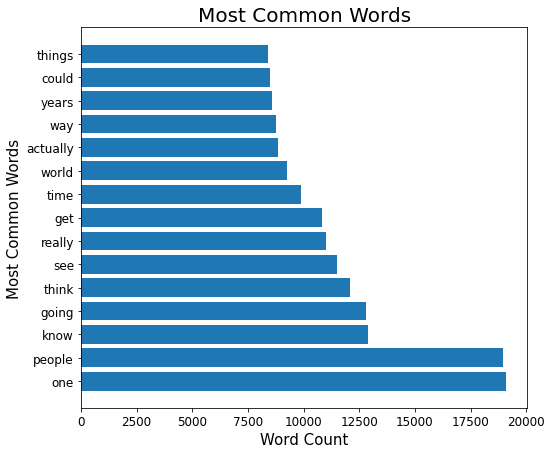

In [69]:
# Getting Most Common Words n - Histogram
n = 15
most_bow = list(zip(*bow_df.most_common(n)))

fig, ax = plt.subplots(figsize=(8,7))
plt.barh(most_bow[0], most_bow[1])
plt.title('Most Common Words', size=20)
plt.xlabel('Word Count', size=15)
plt.ylabel('Most Common Words', size=15)
plt.xticks(size=12, rotation=0)
plt.yticks(size=12, rotation=0)
plt.show()

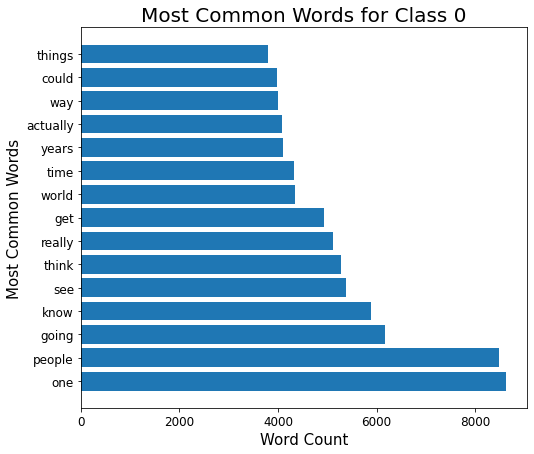

In [70]:
# Getting Most Common Words n - Histogram for Class 0
n = 15
most_bow0 = list(zip(*class0_bow.most_common(n)))

fig, ax = plt.subplots(figsize=(8,7))
plt.barh(most_bow0[0], most_bow0[1])
plt.title('Most Common Words for Class 0', size=20)
plt.xlabel('Word Count', size=15)
plt.ylabel('Most Common Words', size=15)
plt.xticks(size=12, rotation=0)
plt.yticks(size=12, rotation=0)
plt.show()

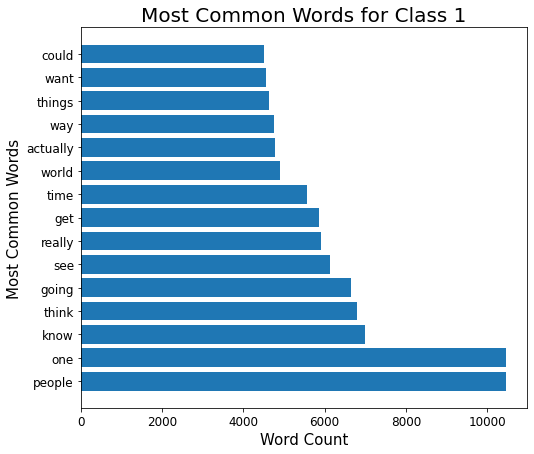

In [71]:
# Getting Most Common Words n - Histogram for Class 1
n = 15
most_bow1 = list(zip(*class1_bow.most_common(n)))

fig, ax = plt.subplots(figsize=(8,7))
plt.barh(most_bow1[0], most_bow1[1])
plt.title('Most Common Words for Class 1', size=20)
plt.xlabel('Word Count', size=15)
plt.ylabel('Most Common Words', size=15)
plt.xticks(size=12, rotation=0)
plt.yticks(size=12, rotation=0)
plt.show()

In [72]:
type(bow_df)

nltk.probability.FreqDist

In [73]:
# bow_df.most_common(10)

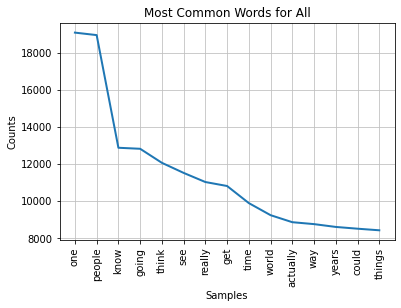

In [74]:
bow_df.plot(15, title='Most Common Words for All')

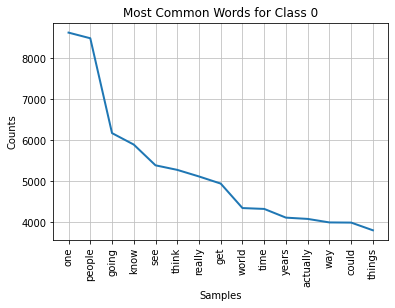

In [75]:
class0_bow.plot(15, title='Most Common Words for Class 0')

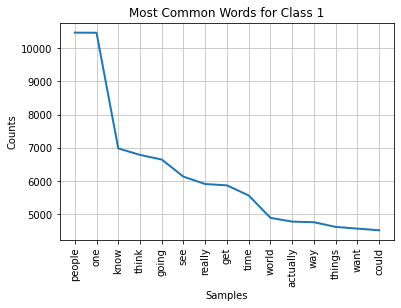

In [76]:
class1_bow.plot(15, title='Most Common Words for Class 1')

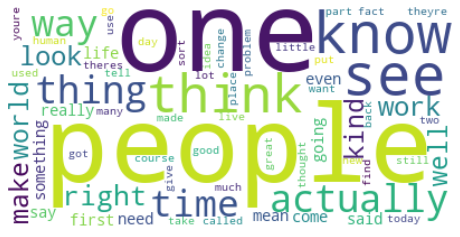

In [77]:
# Getting Most Common Words n - WordCloud
wordsSW = ' '.join([w for w in df.transcript_lem])
wordCloud = WordCloud(max_words=75 , background_color='white', min_font_size=8).generate(wordsSW)


plt.figure(figsize=(8, 7), facecolor=None)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Baseline Model 
- Random Forest 


### Random Forest

In [156]:
X = df.transcript_lem
y = df.target
# extraX = 

In [157]:
from collections import Counter
Counter(y)
# array([1152, 1315])

Counter({0: 1152, 1: 1315})

In [158]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(X)

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [160]:
X.shape

(2467, 97248)

In [161]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1973, 97248), (494, 97248), (1973,), (494,))

In [162]:
# Base Line Model RandomForestClassifier
base_model = RandomForestClassifier() # oob_score=True
base_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [163]:
# base_model.oob_score_

AxesSubplot(0.125,0.125;0.62x0.755)


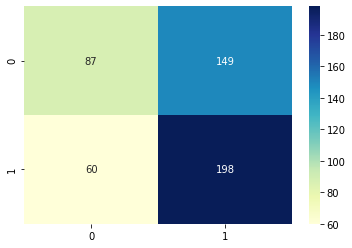

In [164]:
predictions = base_model.predict(X_test)
base_matrix = confusion_matrix(y_test, predictions)

fig, ax = plt.subplots()
# sn.color_palette("light:b", as_cmap=True)
print(sn.heatmap(base_matrix, annot=True, ax=ax, fmt='g', cmap='YlGnBu'))

In [165]:
## Lots of False Negatives, Type I Errors - Class 0 Recall very low

In [166]:
print(classification_report(y_test, predictions))
print('Accuracy: {}'.format(accuracy_score(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.59      0.37      0.45       236
           1       0.57      0.77      0.65       258

    accuracy                           0.58       494
   macro avg       0.58      0.57      0.55       494
weighted avg       0.58      0.58      0.56       494

Accuracy: 0.5769230769230769


#### Feature Importance

In [91]:
# Future Importance
feat_imp = base_model.feature_importances_
sorted_imp = np.argsort(feat_imp)[-20:]
tf_feat_names = tfidf.get_feature_names() 
tf_feat_names = np.array(tf_feat_names)
feat_imp_words = tf_feat_names[np.argsort(feat_imp)][-20:]

ft_dict = {'feature_names':tf_feat_names,'feature_importance':feat_imp}
data = pd.DataFrame(ft_dict)
data = data.sort_values(by='feature_importance', ascending=False)

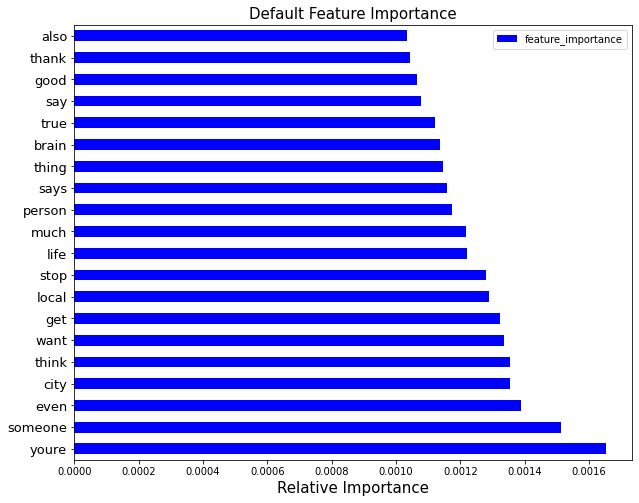

In [167]:
# Plot the feature importance - gini importance
feat_scores = pd.Series(base_model.feature_importances_, index=data.feature_names)
feat_scores = data.sort_values(by='feature_importance', ascending=False)[:20]

ax = feat_scores.plot(kind='barh', figsize=(10,8), color='b')
ax.set_title('Default Feature Importance', fontsize=15)
ax.set_xlabel('Relative Importance', fontsize=15)
ax.set_yticklabels(data.feature_names, fontsize=13)
plt.show()

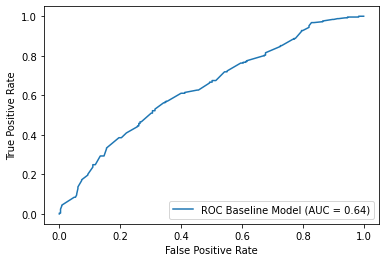

In [93]:
from sklearn.metrics import  plot_roc_curve

fig, ax = plt.subplots()

base_model.fit(X_train,y_train)
plot_roc_curve(base_model, X_test, y_test, ax=ax, name='ROC Baseline Model')
plt.show()

##### Manual Parameter Tuning (Skipped)
- Min_df and Max_df

In [94]:
# import decimal
# def float_range(start, stop, step):
#   while start < stop:
#     yield float(start)
#     start += decimal.Decimal(step)

# stepup = list(float_range(0, 0.0301, '0.001'))
# # stepup

In [95]:
# def mod(X, y, lst_step=stepup):
#   for i in stepup:
#     X = df.transcript_lem
#     y = df.target
#     tfidf = TfidfVectorizer(min_df=i)
#     X = tfidf.fit_transform(X)
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

#     base_model = RandomForestClassifier()
#     base_model.fit(X_train, y_train)
#     predictions = base_model.predict(X_test)
#     base_matrix = confusion_matrix(y_test, predictions)

#     # fig, ax = plt.subplots()
#     # print(sn.heatmap(base_matrix, annot=True, ax=ax, fmt='g'))
#     # print(classification_report(y_test, predictions))
#     print('Accuracy: {}, with min_df at {}'.format(accuracy_score(y_test, predictions), i))

In [96]:
# stepup = [0.01, 0.02, 0.023, 0.03]

In [97]:
# mod(X, y, stepup)  # 0.62955 at 0.01 a close second with 0.02; 0.6396 with min_df 0.03 and close 0.023

In [98]:
# from numpy import arange
# stepdown = []
# for i in arange(1.0, -0.00001, -0.005):
#   stepdown.append(i)

# # stepdown

In [99]:
# def mod_maxdf(X, y, lst_step=stepdown):
#   for i in stepdown:
#     X = df.transcript_lem
#     y = df.target
#     tfidf = TfidfVectorizer(max_df=i)
#     X = tfidf.fit_transform(X)
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

#     base_model = RandomForestClassifier(n_jobs=-1)
#     base_model.fit(X_train, y_train)
#     predictions = base_model.predict(X_test)
#     base_matrix = confusion_matrix(y_test, predictions)

#     # fig, ax = plt.subplots()
#     # print(sn.heatmap(base_matrix, annot=True, ax=ax, fmt='g'))
#     # print(classification_report(y_test, predictions))
#     print('Accuracy: {}, with max_df at {}'.format(accuracy_score(y_test, predictions), i))

In [100]:
# mod_maxdf(X, y)  # first list above 0.64 [0.994, 0.975, 0.96, 0.95, 0.912, 0.87, 0.72, 0.674, 0.565, 0.47, 0.395, 0.31, 0.276, 0.246, 0.228, 0.2, 0.167, 0.08],
                 # second list above 0.61 [1.0, 0.992, 0.982, 0.962, 0.874, 0.834, 0.806, 0.7899, 0.622, 0.436]

#### GridSearchCV Tuning TF-IDF
- TFIDF Vectorizer
  - Cross Validation 
  - N-grams

In [100]:
# Methods
##########
# min_df, max_df
# Gain Threshold - Information Gain - "better splits" 
# Kfold - Cross Validation
# ngrams, stopwords
# Model Paremeter

In [101]:
import decimal
from numpy import arange

stepdown = []
for i in arange(1.0, -0.00001, -0.005):
  stepdown.append(round(i, 6))

def float_range(start, stop, step):
  while start < stop:
    yield float(start)
    start += decimal.Decimal(step)

stepup = list(float_range(0, 0.065, '0.002'))
# stepup

In [102]:
# min_df = [0.01, 0.02, 0.023, 0.03]
# max_df = [0.994, 0.975, 0.96, 0.95, 0.912, 0.87, 0.72, 0.674, 0.565, 0.47, 0.395, 0.31, 0.276, 0.246, 0.228, 0.2, 0.167, 0.08, 1.0, 0.992, 0.982, 0.962, 0.874, 0.834, 0.806, 0.7899, 0.622, 0.436]

# Best Performing param for TFIDFVec: 
# {'vect__max_df': 0.29, 'vect__min_df': 0.02, 'vect__ngram_range': (1, 3), 'vect__norm': 'l2', 'vect__smooth_idf': True, 'vect__sublinear_tf': True, 'vect__use_idf': False}
# 0.7095094666990329

# {'vect__max_df': 0.29, 'vect__min_df': 0.018} and {'vect__max_df': 0.228, 'vect__min_df': 0.02} with 0.66

min_df = [0.018, 0.02] #0.00005 
max_df = [0.29, 0.228]
norm = ['l1', 'l2']
use_idf = [True, False]
smooth_idf = [True, False]
sublinear_tf = [True, False]
ngram_range = [(1, 1), (1, 2), (2, 2)] # when changing n grams min_df must also change 
# cv = [0, 5, 19, 25]

In [104]:
x = df.transcript_lem
Y = df.target

x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.25)

# TFIDF Vectorizer 
pipeline = Pipeline([
           ('vect', TfidfVectorizer()), 
           ('clf', RandomForestClassifier())], verbose=True)

parameters = [
{
    # 'vect__min_df': min_df,
    # 'vect__max_df': max_df,
    'vect__norm': norm, 
    'vect__use_idf': use_idf, 
    'vect__smooth_idf': smooth_idf,
    'vect__sublinear_tf': sublinear_tf,
    'vect__ngram_range': ngram_range
}, 
{}]

# Instantiate the grid search model
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, scoring='f1') #'f1', 'recall' #cv=5,9,19,25

# Fit the grid search to the data
grid_search.fit(x_train, Y_train)
print(grid_search.best_estimator_)
print(grid_search.best_params_)
print(grid_search.best_score_)
# print(grid_search.cv_results_)

[Pipeline] .............. (step 1 of 2) Processing vect, total=   8.7s
[Pipeline] ............... (step 2 of 2) Processing clf, total=  33.7s
Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=False,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
            

##### Score Value Storage - GridSearchCV TF-IDF

In [105]:
##################################
# Ngrams integrated

# {'vect__max_df': 0.228, 'vect__min_df': 0.02, 'vect__ngram_range': (1, 1), 'vect__norm': 'l2', 'vect__smooth_idf': True, 'vect__sublinear_tf': True, 'vect__use_idf': True}
# 0.6340461350639337

# {'vect__max_df': 0.228, 'vect__min_df': 0.02, 'vect__ngram_range': (1, 1), 'vect__norm': 'l2', 'vect__smooth_idf': False, 'vect__sublinear_tf': True, 'vect__use_idf': True}
# 0.6391261324937352

##################################

# {'vect__max_df': 0.228, 'vect__min_df': 0.018, 'vect__ngram_range': (1, 2), 'vect__norm': 'l2', 'vect__smooth_idf': True, 'vect__sublinear_tf': True, 'vect__use_idf': True}
# 0.6869519591495102 at 'f1'

# {'vect__max_df': 0.228, 'vect__min_df': 0.02, 'vect__ngram_range': (1, 1), 'vect__norm': 'l1', 'vect__smooth_idf': False, 'vect__sublinear_tf': False, 'vect__use_idf': False}
# 0.688607527389253 at 'f1' 

# {'vect__max_df': 0.228, 'vect__min_df': 0.018, 'vect__ngram_range': (1, 1), 'vect__norm': 'l2', 'vect__smooth_idf': True, 'vect__sublinear_tf': False, 'vect__use_idf': True}
# 0.6870945479576246

# {'vect__max_df': 0.29, 'vect__min_df': 0.02, 'vect__ngram_range': (1, 1), 'vect__norm': 'l1', 'vect__smooth_idf': True, 'vect__sublinear_tf': True, 'vect__use_idf': False}
# 0.6845197057043328

# {'vect__max_df': 0.29, 'vect__min_df': 0.018, 'vect__ngram_range': (1, 2), 'vect__norm': 'l2', 'vect__smooth_idf': True, 'vect__sublinear_tf': False, 'vect__use_idf': True}
# 0.6901509836994344

# {'vect__max_df': 0.228, 'vect__min_df': 0.018, 'vect__ngram_range': (1, 2), 'vect__norm': 'l1', 'vect__smooth_idf': False, 'vect__sublinear_tf': False, 'vect__use_idf': False}
# 0.6802163306513962

# {'vect__max_df': 0.228, 'vect__min_df': 0.018, 'vect__ngram_range': (2, 2), 'vect__norm': 'l2', 'vect__smooth_idf': True, 'vect__sublinear_tf': True, 'vect__use_idf': True}
# 0.6621582690494293

# {'vect__max_df': 0.29, 'vect__min_df': 0.02, 'vect__ngram_range': (1, 3), 'vect__norm': 'l2', 'vect__smooth_idf': True, 'vect__sublinear_tf': True, 'vect__use_idf': False}
# 0.7095094666990329

# {'vect__max_df': 0.228, 'vect__min_df': 0.02, 'vect__ngram_range': (1, 3), 'vect__norm': 'l2', 'vect__smooth_idf': False, 'vect__sublinear_tf': True, 'vect__use_idf': True}
# 0.6872420310158359

# {'vect__max_df': 0.29, 'vect__ngram_range': (1, 1), 'vect__norm': 'l2', 'vect__smooth_idf': False, 'vect__sublinear_tf': False, 'vect__use_idf': True}
# 0.6887223160034519

# {'vect__ngram_range': (1, 1), 'vect__norm': 'l1', 'vect__smooth_idf': True, 'vect__sublinear_tf': True, 'vect__use_idf': True}
# 0.6775539204421807

#### GridSearch Tuning 
- CountVectorizer

In [106]:
# import decimal
# from numpy import arange

# stepdown = []
# for i in arange(1.0, -0.00001, -0.005):
#   stepdown.append(round(i, 6))

# def float_range(start, stop, step):
#   while start < stop:
#     yield float(start)
#     start += decimal.Decimal(step)

# stepup = list(float_range(0, 0.02, '0.0025'))
# # stepup

In [107]:
# def mod(x, Y, lst_step=stepup):
#   for i in stepup:
#     x = df.transcript_lem
#     y = df.target
#     vec = CountVectorizer(ngram_range=(1, 2), min_df=i)
#     x = vec.fit_transform(x)
#     x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.25)

#     model = RandomForestClassifier()
#     model.fit(x_train, Y_train)
#     pred = model.predict(x_test)
#     matrix = confusion_matrix(y_test, pred)

#     # fig, ax = plt.subplots()
#     # print(sn.heatmap(base_matrix, annot=True, ax=ax, fmt='g'))
#     # print(classification_report(y_test, predictions))
#     print('Accuracy: {}, with min_df at {}'.format(accuracy_score(Y_test, pred), i))

In [108]:
# mod(x, Y) # for ngram_range(1, 3) optimal range 0.0 to 0.055 or 0.065 at peak acc: 0.638
          # for ngram_range(1, 2) optimal range 0.0 to 0.2 at peak acc: 0.612
          # for ngram_range(1, 2) optimal range 0.0 to 0.1 at peak acc: 0.64
          # for ngram_range(1, 2) optimal range 0.0 to 0.02 at peak acc: 0.62

In [109]:
# x = df.transcript_lem
# Y = df.target

# x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.25)

# pipeline_vec = Pipeline([
#            ('vect', CountVectorizer(stop_words='english', ngram_range=(1, 2), min_df=0.1)), 
#            ('clf', RandomForestClassifier())], verbose=True)

# parameters_vec = [
# {     
#             'vect__ngram_range': [(1, 2), (1, 3)],
#             'vect__min_df': stepdown
# }, 
# {}]

# # Instantiate the grid search model
# grid_search_vec = GridSearchCV(pipeline_vec, parameters_vec, n_jobs=-1, scoring='f1') #'recall'

# # Fit the grid search to the data
# grid_search_vec.fit(x_train, Y_train)
# print(grid_search_vec.best_estimator_)
# print(grid_search_vec.best_params_)
# print(grid_search_vec.best_score_)

##### Score Value Storage - GridSearchCV CountVec

In [110]:
##################################
# Ngrams integrated

# {'vect__ngram_range': (1, 2)}
# 0.7078923570106946

# {'vect__ngram_range': (2, 3)}
# 0.6957201287547469

# {'vect__ngram_range': (1, 3)}
# 0.6995404529092819

# {'vect__ngram_range': (2, 3)}
# 0.6976036377111458

# {'vect__ngram_range': (1, 3)}
# 0.7009485634369927

# {'vect__ngram_range': (1, 3)}
# 0.6994263083675284

#### Tuning Best Parameters**

In [111]:
# Methods
##########
# min_df, max_df - drop df below or above threshold - yes
# Gain Threshold - Information Gain - "better splits" 
# Kfold - cv: Cross Validation - yes
# ngrams, stopwords - yes
# Model Paremeter

In [199]:
# Top Performing Parameters

# {'vect__max_df': 0.228, 'vect__min_df': 0.02, 'vect__ngram_range': (1, 1), 'vect__norm': 'l1', 'vect__smooth_idf': False, 'vect__sublinear_tf': False, 'vect__use_idf': False}
# 0.6906901426749745
# {'vect__max_df': 0.29, 'vect__min_df': 0.02, 'vect__ngram_range': (1, 3), 'vect__norm': 'l2', 'vect__smooth_idf': True, 'vect__sublinear_tf': True, 'vect__use_idf': False}
# 0.7095094666990329

top_performing_param_tdidf = {
                        # 'min_df': 0.02,
                        # 'max_df': 0.228,
                        'norm': 'l1', 
                        'smooth_idf': False, 
                        'sublinear_tf': False, 
                        'use_idf': False, 
                        'ngram_range': (1, 1)
                        }


##### Test Size and SelectKBest Tuning

In [200]:
x = df.transcript_lem
Y = df.target
# print(x.shape)
# Best Performing parameters for TFIDF and SelectKBest
tfidf = TfidfVectorizer(top_performing_param_tdidf) #  all False and (1, 2)
x = tfidf.fit_transform(x)

# Perform feature selection
x = SelectKBest(mutual_info_classif).fit_transform(x, Y)

# print(x.shape)
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.25)

In [201]:
x_train.shape, x_test.shape, Y_train.shape, Y_test.shape

((1850, 10), (617, 10), (1850,), (617,))

In [202]:
# fit = k_best.fit(x_train, Y_train)

# u_features = fit.transform(x_train)

In [203]:
# Base Line Model RandomForestClassifier and Tuned TfidfVectorizer param with feature selection
tuning_model = RandomForestClassifier(n_jobs=-1) # 
tuning_model.fit(x_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [204]:
# from sklearn.model_selection import cross_val_score
# from numpy import mean, absolute, sqrt

# cv = KFold(n_splits=20, shuffle=True)
# score = cross_val_score(tuning_model, x, Y, cv=cv, n_jobs=-1)
# print(score)
# print(mean(absolute(score)))
# print(sqrt(mean(absolute(score))))

Accuracy score: 0.5381
AxesSubplot(0.125,0.125;0.62x0.755)


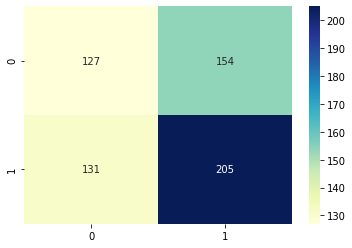

In [205]:
tuned_predictions = tuning_model.predict(x_test)
tuned_matrix = confusion_matrix(Y_test, tuned_predictions)

fig, ax = plt.subplots()
print('Accuracy score: {:.4}'.format(tuning_model.score(x_test, Y_test)))
print(sn.heatmap(tuned_matrix, annot=True, ax=ax, fmt='g', cmap='YlGnBu'))

In [206]:
print(classification_report(Y_test, tuned_predictions))
print('Accuracy: {}'.format(accuracy_score(Y_test, tuned_predictions))) 
# best accuracy 0.66 with {'vect__max_df': 0.228, 'vect__min_df': 0.02}

              precision    recall  f1-score   support

           0       0.49      0.45      0.47       281
           1       0.57      0.61      0.59       336

    accuracy                           0.54       617
   macro avg       0.53      0.53      0.53       617
weighted avg       0.54      0.54      0.54       617

Accuracy: 0.5380875202593193


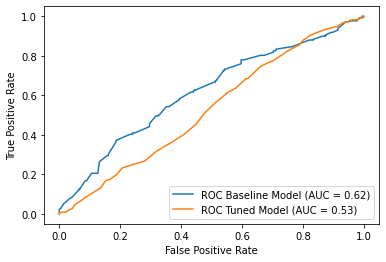

In [207]:
fig, ax = plt.subplots()

base_model.fit(X_train,y_train)
plot_roc_curve(base_model, X_test, y_test, ax=ax, name='ROC Baseline Model')
plot_roc_curve(tuning_model, x_test, Y_test, ax=ax, name='ROC Tuned Model')
plt.show()

#### Tuning Best Parameters***

In [ ]:
# For Feature Importance
x = df.transcript_lem
Y = df.target

tuned_param = {
                        'norm': 'l1', 
                        'stop_words': 'english',
                        'smooth_idf': False, 
                        'sublinear_tf': False, 
                        'use_idf': False, 
                        'ngram_range': (1, 2)
                        }
# Best Performing parameters for Count Vect 
vec = CountVectorizer(tuned_param) 
x = vec.fit_transform(x)

# Perform feature selection
x = SelectKBest(mutual_info_classif, k=100).fit_transform(x, Y)

x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.25)

# Base Line Model RandomForestClassifier and countVec with bigrams param with feature reduction
tuned_model = RandomForestClassifier(n_jobs=-1) # 
tuned_model.fit(x_train, Y_train)

In [ ]:
# Future Importance for Tuned Model - CountVec
feat_imp_tuned = tuned_model.feature_importances_
sorted_imp_tuned = np.argsort(feat_imp_tuned)[-30:]
tf_feat_names_tuned = vec.get_feature_names() 
tf_feat_names_tuned = np.array(tf_feat_names_tuned)
feat_imp_words_tuned = tf_feat_names_tuned[np.argsort(feat_imp_tuned)][-30:]

ft_dict_tuned = {'feature_names':tf_feat_names_tuned,'feature_importance':feat_imp_tuned}
data_tuned = pd.DataFrame(ft_dict_tuned)
data_tuned = data_tuned.sort_values(by='feature_importance', ascending=False)

# Plot the feature importance for Tuned Model - gini importance
feat_scores_tuned = pd.Series(tuned_model.feature_importances_, index=data_tuned.feature_names)
feat_scores_tuned = data_tuned.sort_values(by='feature_importance', ascending=False)[:30]

ax = feat_scores_tuned.plot(kind='barh', figsize=(14,10), color='b')
ax.set_title('Tuned Feature Importance', fontsize=15)
ax.set_xlabel('Relative Importance Tuned', fontsize=15)
ax.set_yticklabels(data_tuned.feature_names, fontsize=13)
plt.show()

Accuracy score: 0.637
AxesSubplot(0.125,0.125;0.62x0.755)


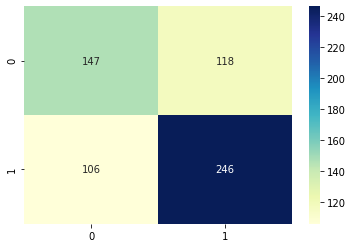

In [171]:
tuned_pred = tuned_model.predict(x_test)
tuned_matx = confusion_matrix(Y_test, tuned_pred)

fig, ax = plt.subplots()
print('Accuracy score: {:.4}'.format(tuned_model.score(x_test, Y_test)))
print(sn.heatmap(tuned_matx, annot=True, ax=ax, fmt='g', cmap='YlGnBu'))

In [172]:
print(classification_report(Y_test, tuned_pred))
print('Accuracy: {}'.format(accuracy_score(Y_test, tuned_pred))) 
# best accuracy 0.66 with {'vect__max_df': 0.228, 'vect__min_df': 0.02}

              precision    recall  f1-score   support

           0       0.58      0.55      0.57       265
           1       0.68      0.70      0.69       352

    accuracy                           0.64       617
   macro avg       0.63      0.63      0.63       617
weighted avg       0.64      0.64      0.64       617

Accuracy: 0.6369529983792545


In [211]:
# # Future Importance for Tuned Model - CountVec
# feat_imp_tuned = tuned_model.feature_importances_
# sorted_imp_tuned = np.argsort(feat_imp_tuned)[-30:]
# tf_feat_names_tuned = vec.get_feature_names() 
# tf_feat_names_tuned = np.array(tf_feat_names_tuned)
# feat_imp_words_tuned = tf_feat_names_tuned[np.argsort(feat_imp_tuned)][-30:]

# ft_dict_tuned = {'feature_names':tf_feat_names_tuned,'feature_importance':feat_imp_tuned}
# data_tuned = pd.DataFrame(ft_dict_tuned)
# data_tuned = data_tuned.sort_values(by='feature_importance', ascending=False)

# # Plot the feature importance for Tuned Model - gini importance
# feat_scores_tuned = pd.Series(tuned_model.feature_importances_, index=data_tuned.feature_names)
# feat_scores_tuned = data_tuned.sort_values(by='feature_importance', ascending=False)[:30]

# ax = feat_scores_tuned.plot(kind='barh', figsize=(14,10), color='b')
# ax.set_title('Tuned Feature Importance', fontsize=15)
# ax.set_xlabel('Relative Importance Tuned', fontsize=15)
# ax.set_yticklabels(data_tuned.feature_names, fontsize=13)
# plt.show()

#### Other Misc 
- Explore other "out of the box" models and performance

In [125]:
from scipy import interp
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def plot_roc(X, y, clf_class, plot_name, **kwargs):
    scaler = StandardScaler(with_mean=False)
    X = scaler.fit_transform(X)
    n_splits=10
    kf = KFold(n_splits=n_splits, shuffle=True)
    y_prob = np.zeros((len(y),2))
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []
    for i, (train_index, test_index) in enumerate(kf.split(X)):
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        # Predict probabilities, not classes
        y_prob[test_index] = clf.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y[test_index], y_prob[test_index, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    mean_tpr /= n_splits
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, 'k--',label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
    
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for'+str(plot_name))
    plt.legend(loc="lower right")
    plt.show()

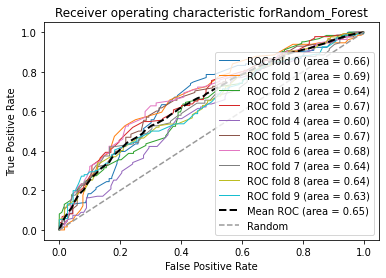

In [126]:
plot_roc(x, Y, RandomForestClassifier, 'Random_Forest')

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [129]:
x = df.transcript_lem
Y = df.target

tfidf = TfidfVectorizer(top_performing_param_tdidf)
x = tfidf.fit_transform(x)

x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.2)

In [130]:
## List of ML Algorithms/ Model Classifiers
models = [LogisticRegression(),
          RandomForestClassifier(),
          XGBClassifier(),
          GradientBoostingClassifier(),
          LGBMClassifier(),
          BernoulliNB() ]

model_dense = [
               SVC()   
]

In [131]:
for model in models:
    model.fit(x_train,Y_train)
    Y_pred = model.predict(x_test)
    proba = model.predict_proba(x_test)
    score = accuracy_score(Y_test,Y_pred)
    bin_clf_rep = classification_report(Y_test,Y_pred, zero_division=1)
    name = str(model)
    print(name[0:name.find("(")])
    print("Accuracy :", score)
    print(bin_clf_rep)
    print(confusion_matrix(Y_test,Y_pred))
    print("------------------------------------------------------------")

LogisticRegression
Accuracy : 0.6336032388663968
              precision    recall  f1-score   support

           0       0.68      0.50      0.58       247
           1       0.61      0.77      0.68       247

    accuracy                           0.63       494
   macro avg       0.64      0.63      0.63       494
weighted avg       0.64      0.63      0.63       494

[[123 124]
 [ 57 190]]
------------------------------------------------------------
RandomForestClassifier
Accuracy : 0.5850202429149798
              precision    recall  f1-score   support

           0       0.63      0.40      0.49       247
           1       0.56      0.77      0.65       247

    accuracy                           0.59       494
   macro avg       0.60      0.59      0.57       494
weighted avg       0.60      0.59      0.57       494

[[ 99 148]
 [ 57 190]]
------------------------------------------------------------
XGBClassifier
Accuracy : 0.5931174089068826
              precision    recal

In [132]:
# for model in model_dense:
#     model.fit(x_train.toarray(),Y_train)
#     Y_pred = model.predict(x_test.toarray())
#     # proba = model.predict_proba(x_test.toarray())
#     score = accuracy_score(Y_test,Y_pred)
#     bin_clf_rep = classification_report(Y_test,Y_pred, zero_division=1)
#     name = str(model)
#     print(name[0:name.find("(")])
#     print("Accuracy :", score)
#     print(bin_clf_rep)
#     print(confusion_matrix(Y_test,Y_pred))

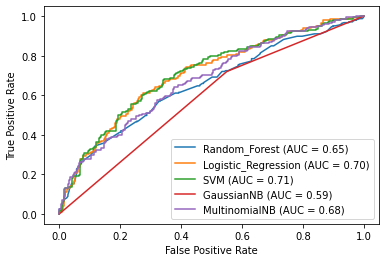

In [135]:
fig, ax = plt.subplots()

model_rf = RandomForestClassifier().fit(x_train, Y_train)
model_lr = LogisticRegression().fit(x_train, Y_train)
model_svm = SVC().fit(x_train, Y_train)
model_gnb = GaussianNB().fit(x_train.todense(), Y_train)
model_mnb = MultinomialNB().fit(x_train.todense(), Y_train)

plot_roc_curve(model_rf, x_test, Y_test, ax=ax, name='Random_Forest')
plot_roc_curve(model_lr, x_test, Y_test, ax=ax, name='Logistic_Regression')
plot_roc_curve(model_svm, x_test, Y_test, ax=ax, name='SVM')
plot_roc_curve(model_gnb, x_test.todense(), Y_test, ax=ax, name='GaussianNB')
plot_roc_curve(model_mnb, x_test.todense(), Y_test, ax=ax, name='MultinomialNB')
plt.show()